In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/BreastUltrasound_images_filtered.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/BreastUltrasound_masks_filtered.npy')

In [3]:
images.shape

(706, 512, 512, 1)

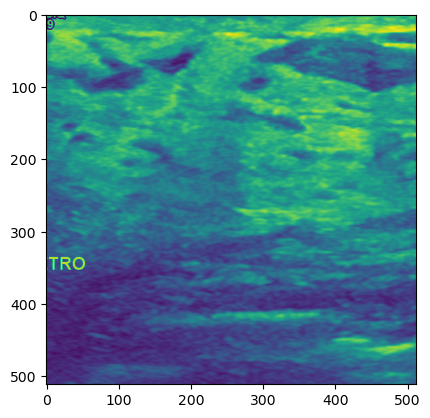

In [4]:
imshow(images[100])

In [5]:
masks.shape

(706, 512, 512, 1)

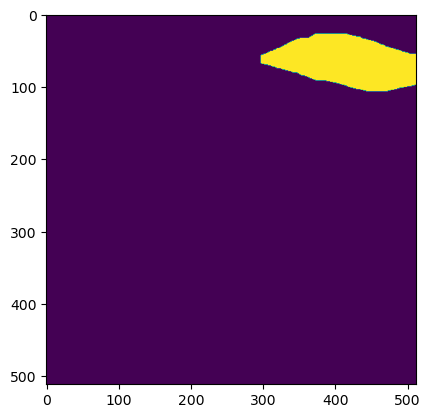

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpe1v7ygy8kuc_unet2d


In [11]:
hist = C.train(images[0:566], masks[0:566], images[566:706], masks[566:706], batch_size=16, patience_counter=4)

Epoch 1/100
36/36 [==============================] - 28s 471ms/step - loss: 0.4077 - dice_coeff: 0.1447 - val_loss: 0.4405 - val_dice_coeff: 0.1634
Epoch 2/100
36/36 [==============================] - 10s 269ms/step - loss: 0.3378 - dice_coeff: 0.1239 - val_loss: 0.4333 - val_dice_coeff: 0.1674
Epoch 3/100
36/36 [==============================] - 10s 269ms/step - loss: 0.3373 - dice_coeff: 0.1241 - val_loss: 0.4569 - val_dice_coeff: 0.1352
Epoch 4/100
36/36 [==============================] - 10s 268ms/step - loss: 0.3344 - dice_coeff: 0.1245 - val_loss: 0.4977 - val_dice_coeff: 0.1001
Epoch 5/100
36/36 [==============================] - 10s 265ms/step - loss: 0.3610 - dice_coeff: 0.1229 - val_loss: 0.4374 - val_dice_coeff: 0.1630
Epoch 6/100
36/36 [==============================] - 10s 266ms/step - loss: 0.3355 - dice_coeff: 0.1249 - val_loss: 0.4353 - val_dice_coeff: 0.1620
Epoch 7/100
36/36 [==============================] - 10s 267ms/step - loss: 0.3345 - dice_coeff: 0.1308 - val_lo

In [12]:
def visualize_predictions(model, images, masks, num_samples=100):
    for i in range(num_samples):
        x_val, y_val = images[i], masks[i]
        y_pred, _ = model.predict(x_val[np.newaxis, ...], y_val[np.newaxis, ...])

        # Draw the input image, true mask, and predicted mask
        fig, ax = plt.subplots(nrows=1, ncols=3)
        
        ax[0].imshow(x_val)
        ax[0].title.set_text('Input Image')

        ax[1].imshow(y_val.squeeze(), cmap='gray')
        ax[1].title.set_text('True Mask')

        ax[2].imshow(y_pred.squeeze(), cmap='gray')
        ax[2].title.set_text('Predicted Mask')

        plt.show()

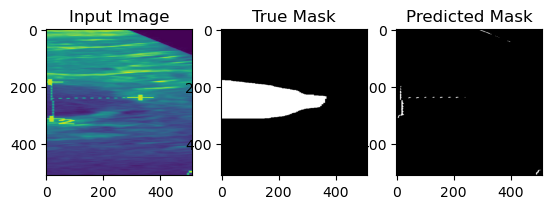

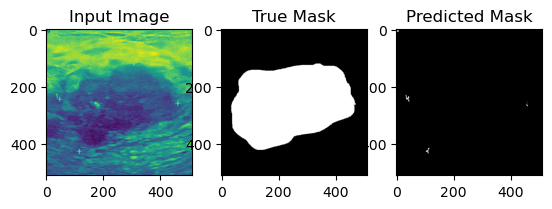

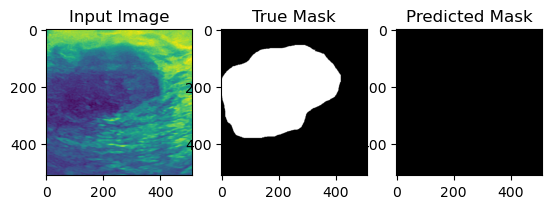

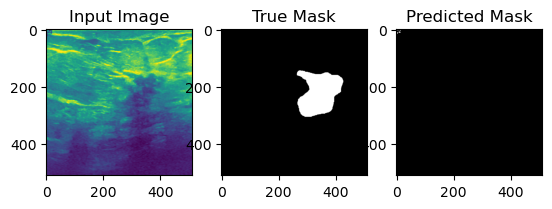

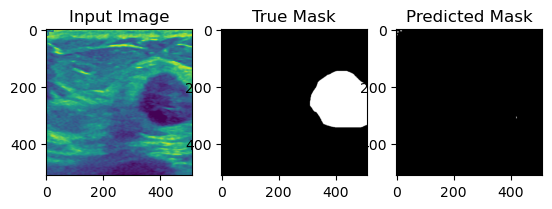

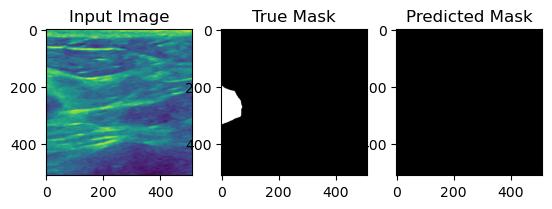

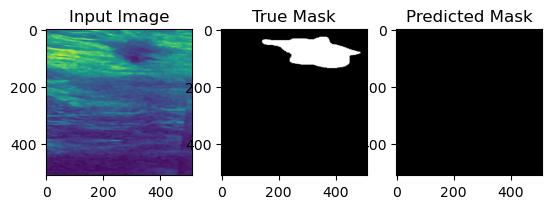

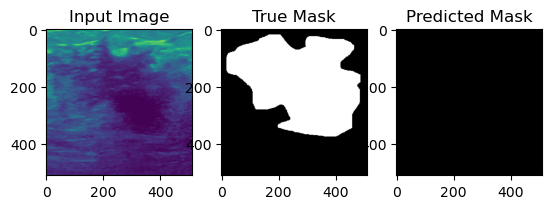

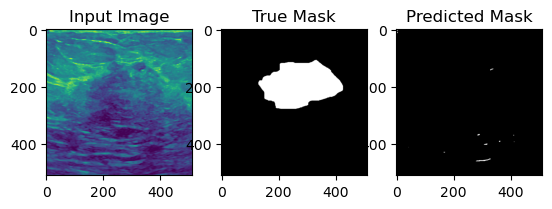

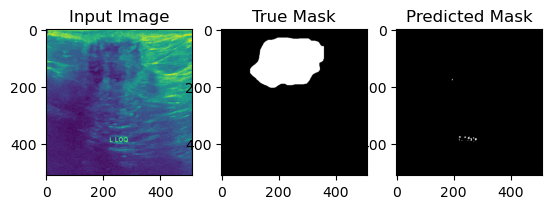

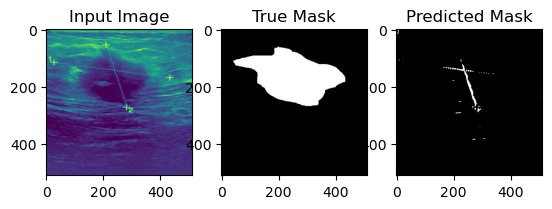

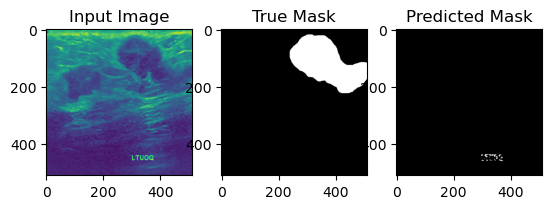

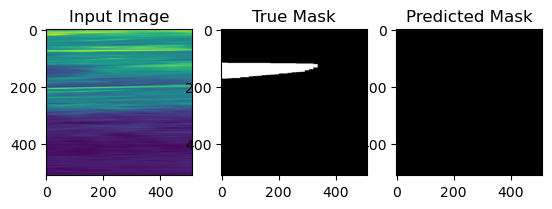

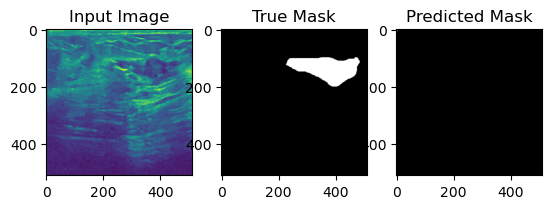

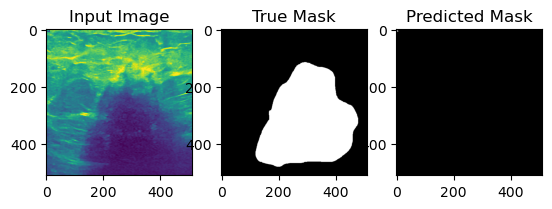

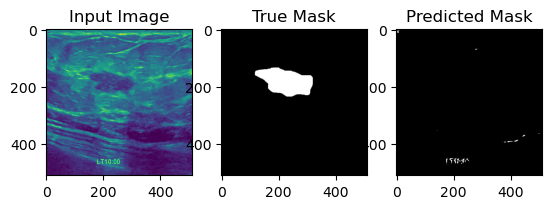

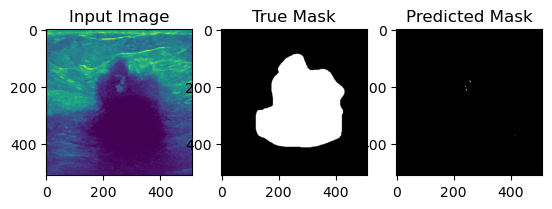

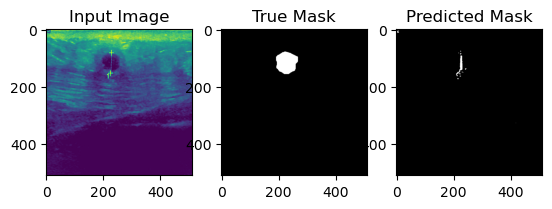

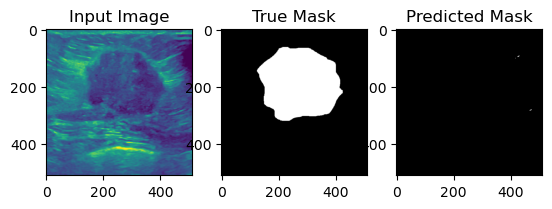

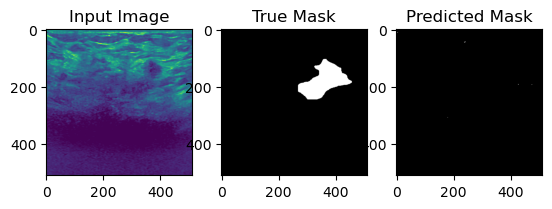

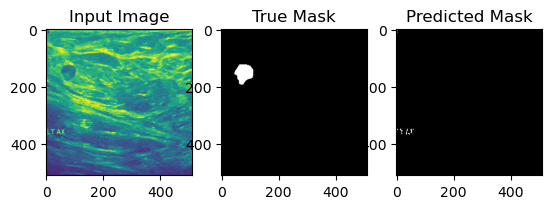

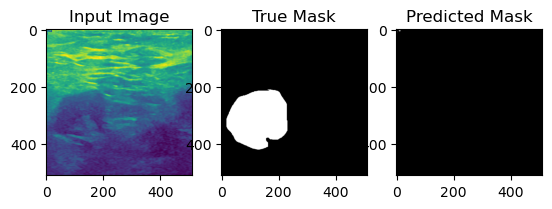

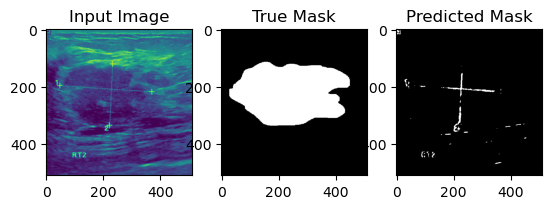

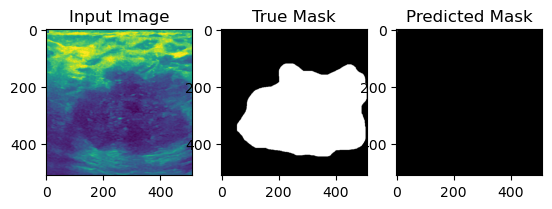

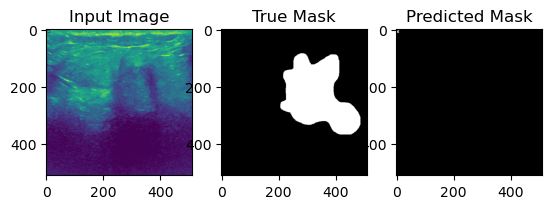

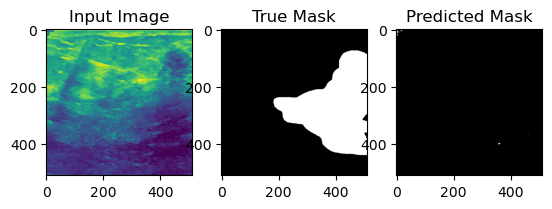

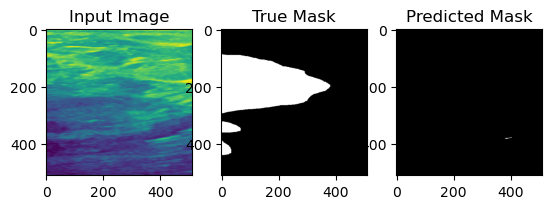

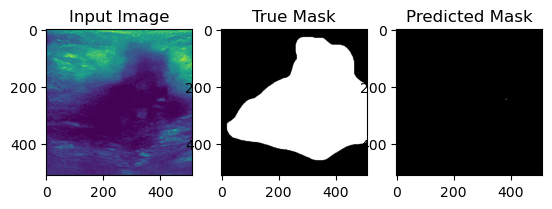

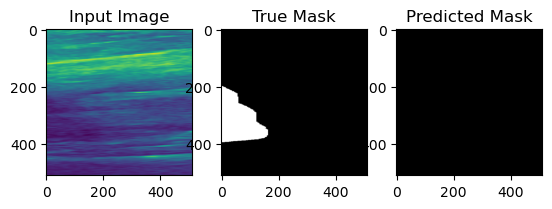

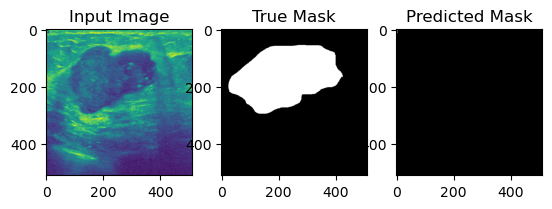

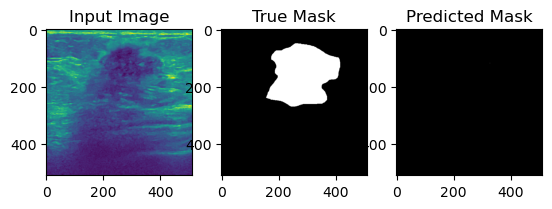

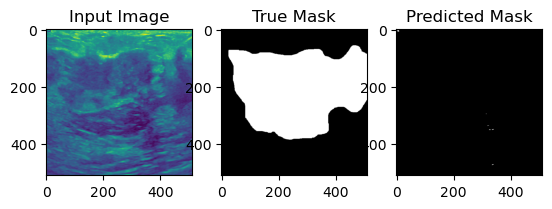

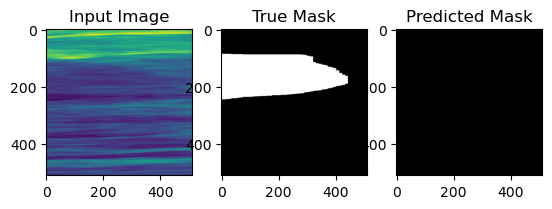

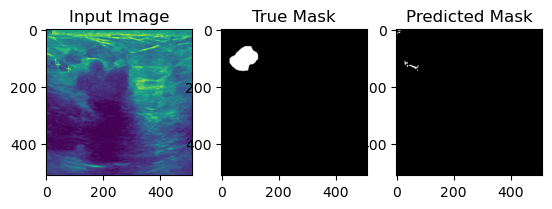

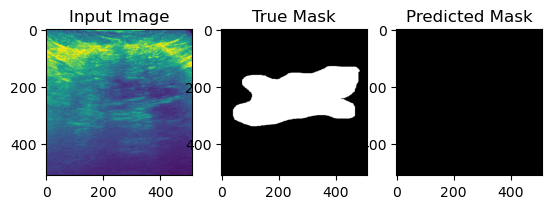

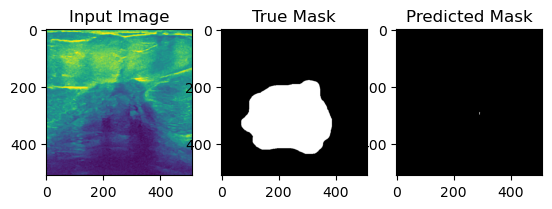

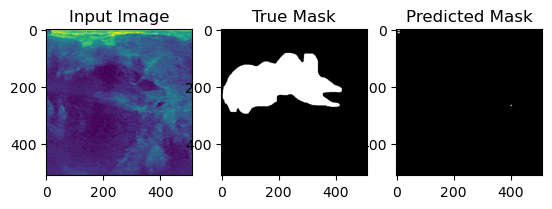

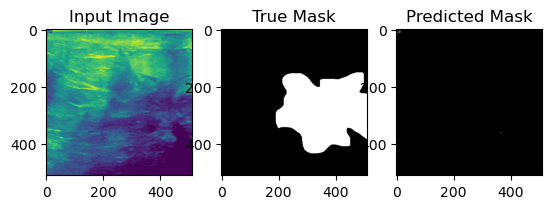

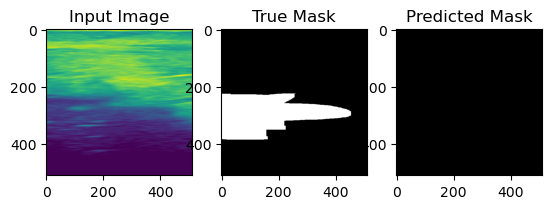

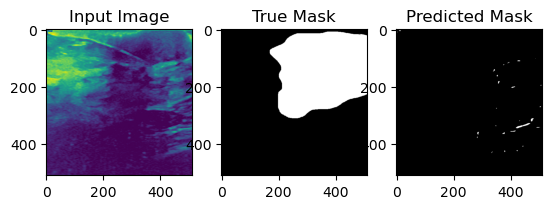

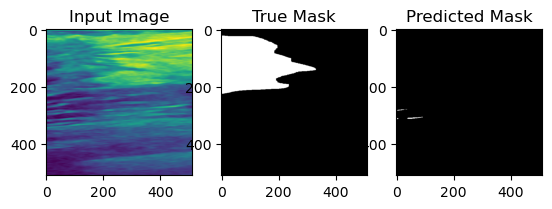

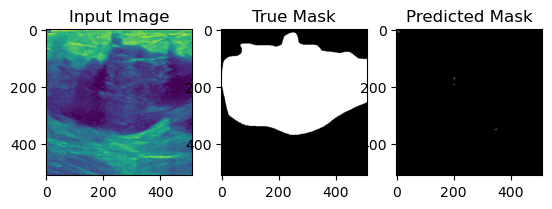

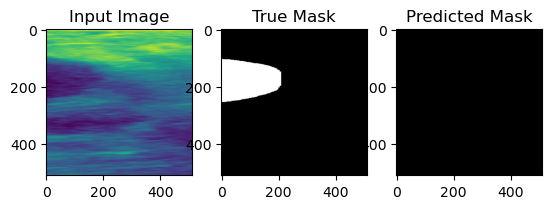

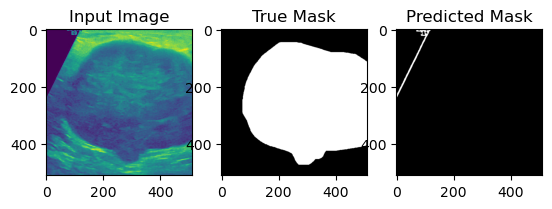

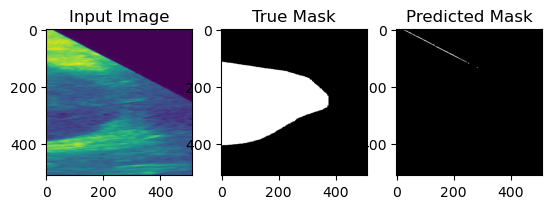

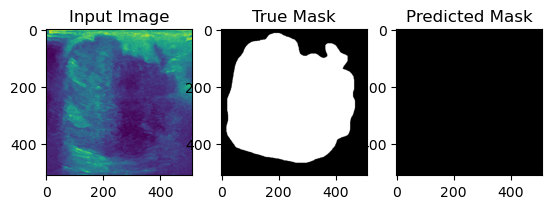

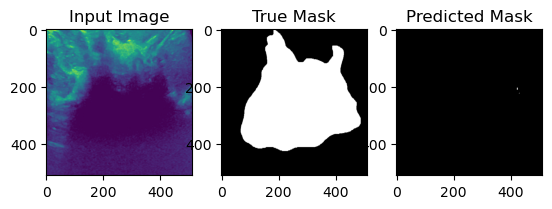

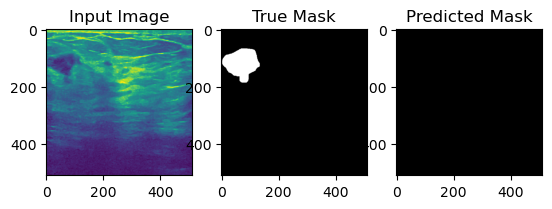

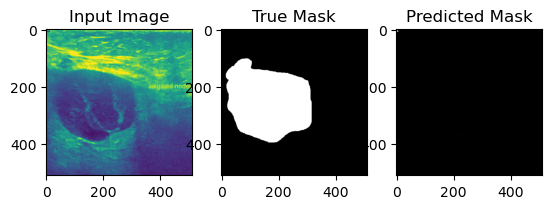

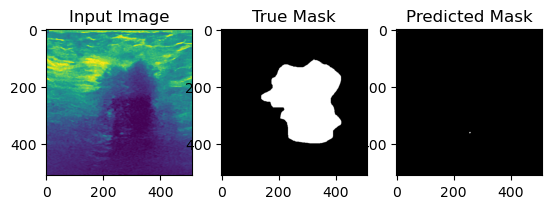

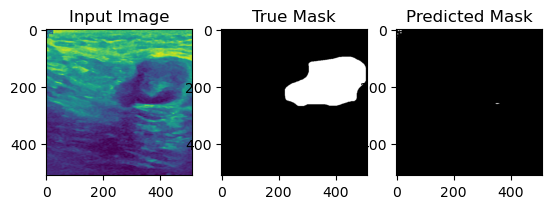

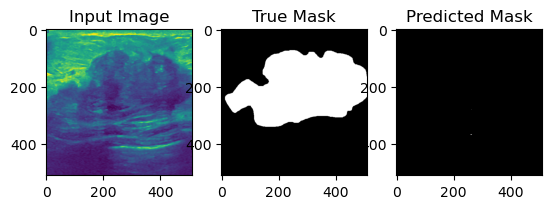

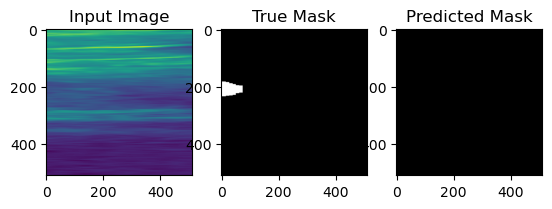

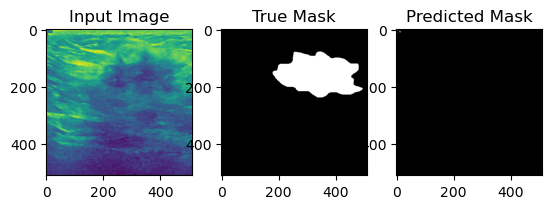

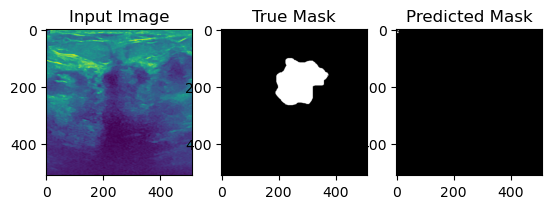

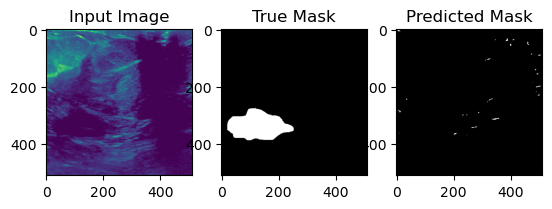

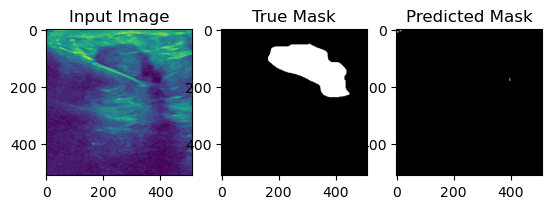

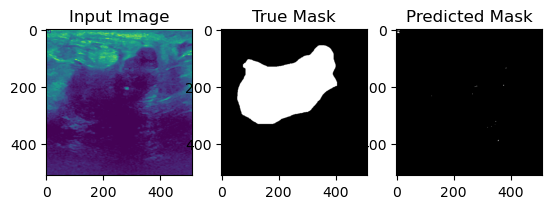

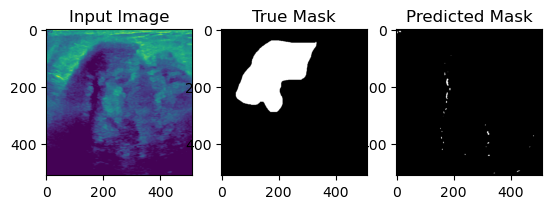

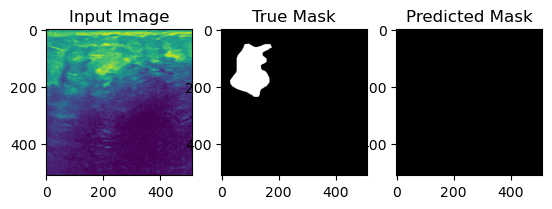

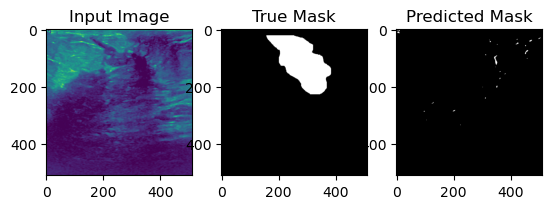

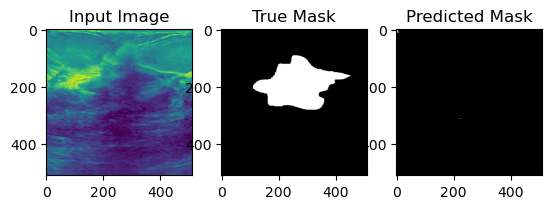

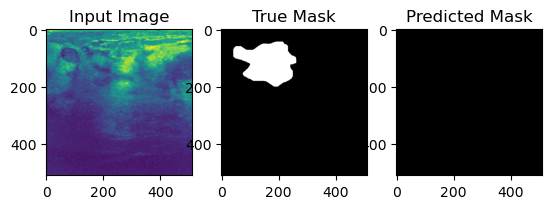

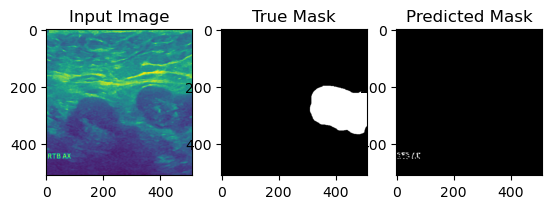

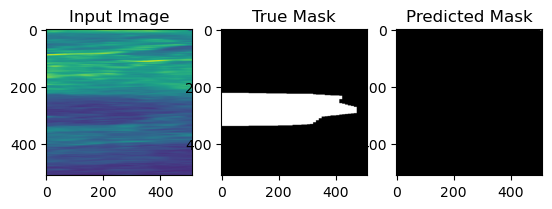

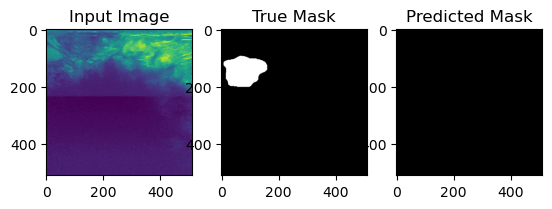

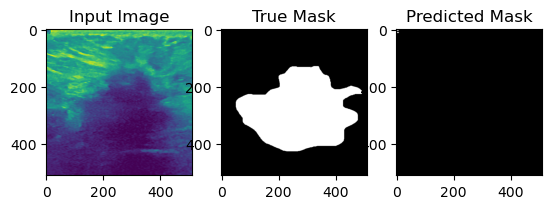

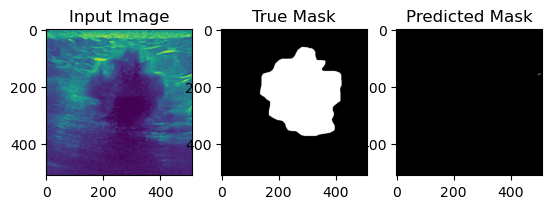

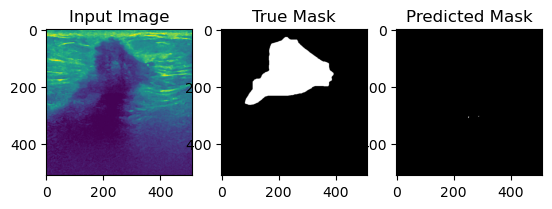

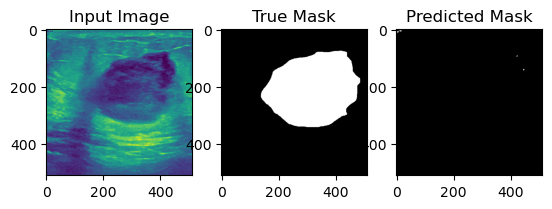

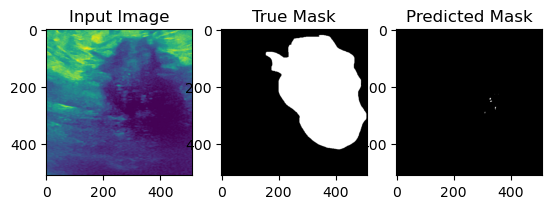

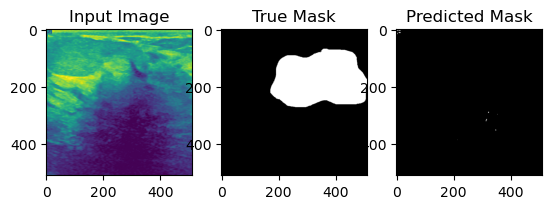

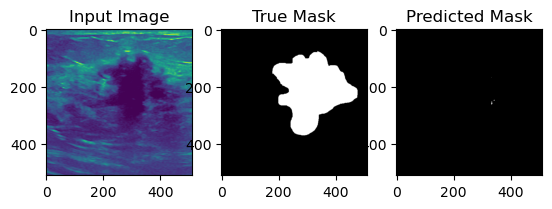

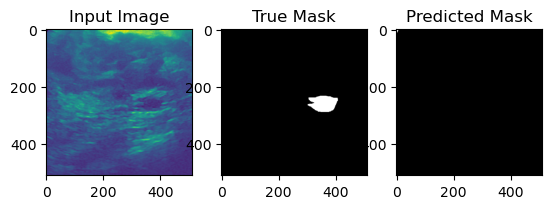

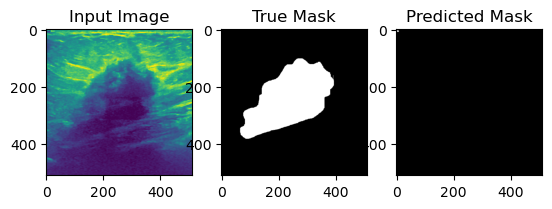

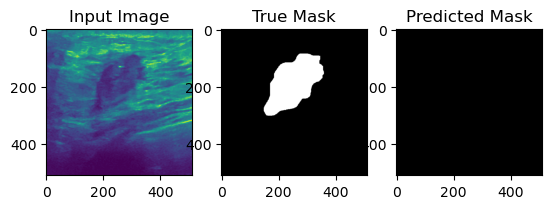

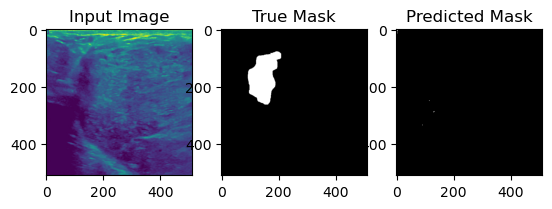

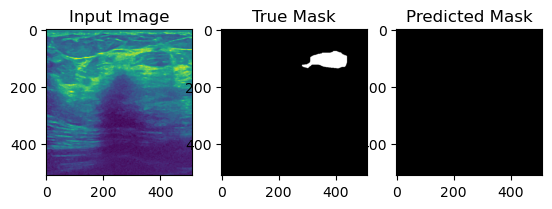

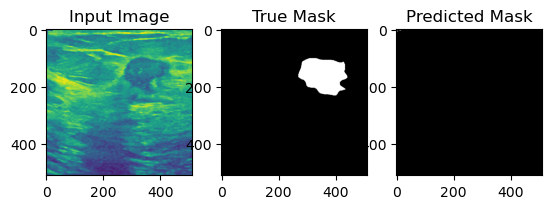

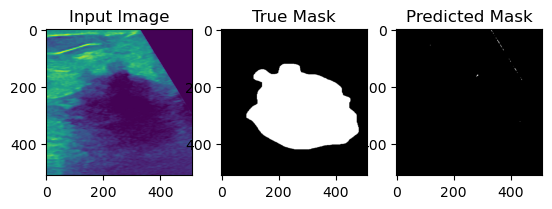

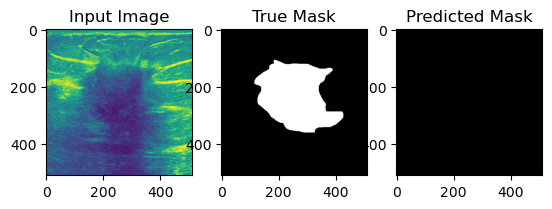

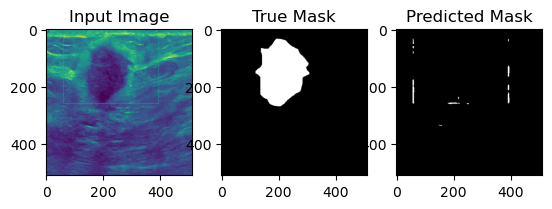

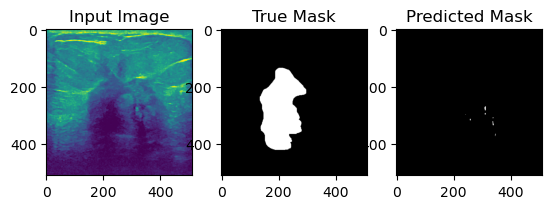

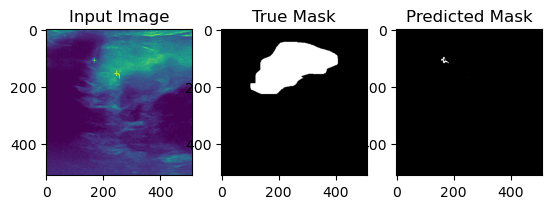

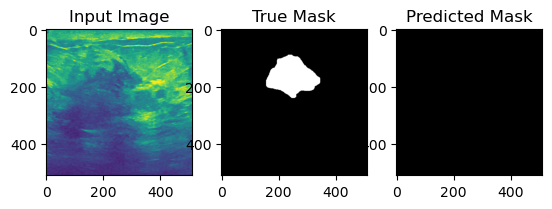

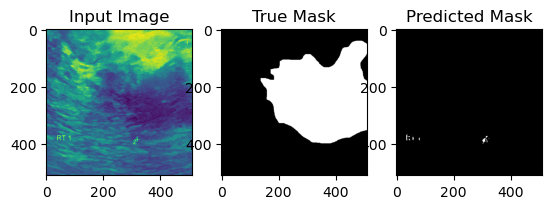

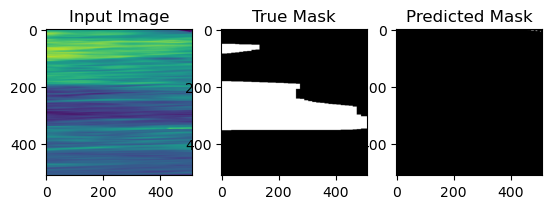

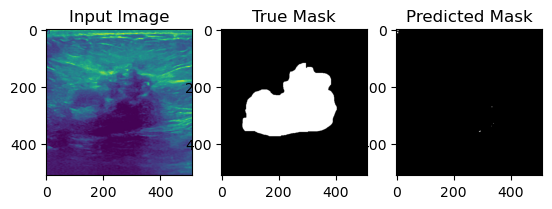

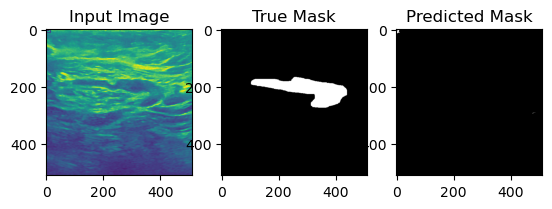

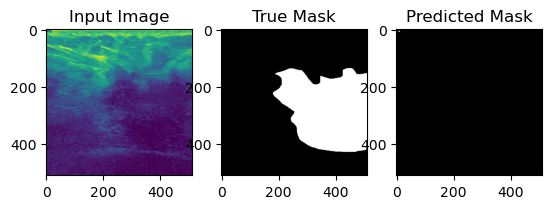

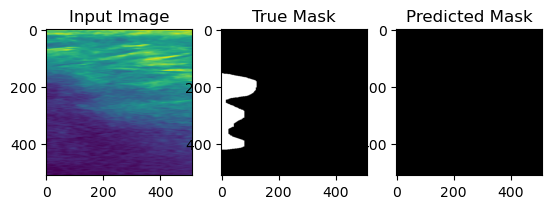

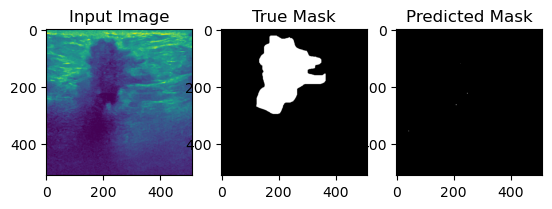

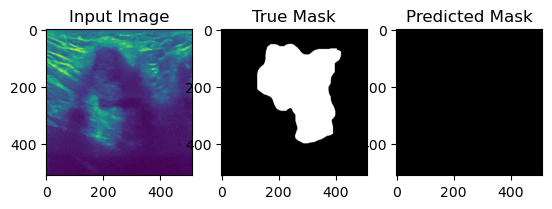

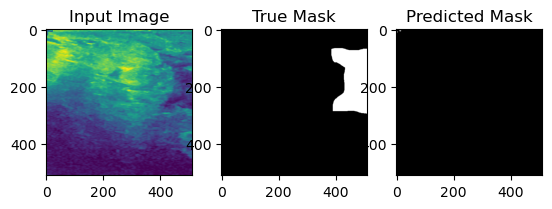

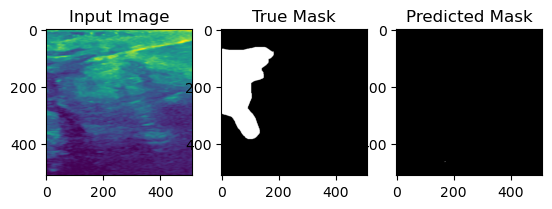

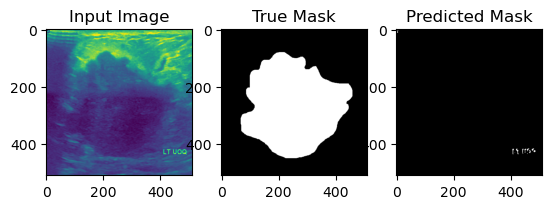

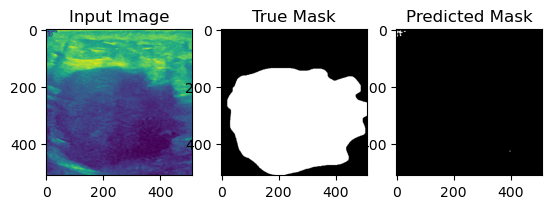

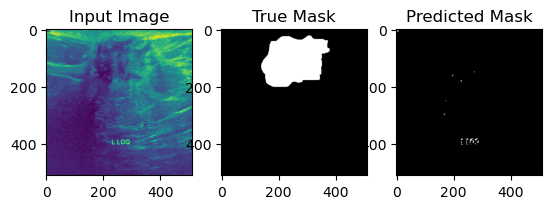

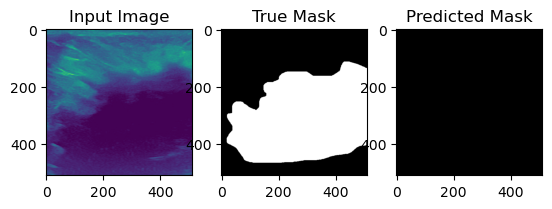

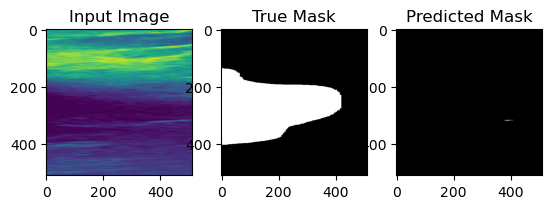

In [13]:
visualize_predictions(C,images[500:706], masks[500:706], num_samples=100)